In [17]:
from src.environment import tictactoe
from src.agent import Agent
import random
import matplotlib.pyplot as plt

Model loaded from trained_agent1.pkl
Epoch 100/1000 | Win Rate: 0.81 | Loss Rate: 0.00 | Draw Rate: 0.19
Epoch 200/1000 | Win Rate: 0.84 | Loss Rate: 0.00 | Draw Rate: 0.16
Epoch 300/1000 | Win Rate: 0.83 | Loss Rate: 0.00 | Draw Rate: 0.17
Epoch 400/1000 | Win Rate: 0.70 | Loss Rate: 0.00 | Draw Rate: 0.30
Epoch 500/1000 | Win Rate: 0.80 | Loss Rate: 0.00 | Draw Rate: 0.20
Epoch 600/1000 | Win Rate: 0.83 | Loss Rate: 0.00 | Draw Rate: 0.17
Epoch 700/1000 | Win Rate: 0.77 | Loss Rate: 0.00 | Draw Rate: 0.23
Epoch 800/1000 | Win Rate: 0.81 | Loss Rate: 0.00 | Draw Rate: 0.19
Epoch 900/1000 | Win Rate: 0.86 | Loss Rate: 0.00 | Draw Rate: 0.14
Epoch 1000/1000 | Win Rate: 0.85 | Loss Rate: 0.00 | Draw Rate: 0.15
Training complete!


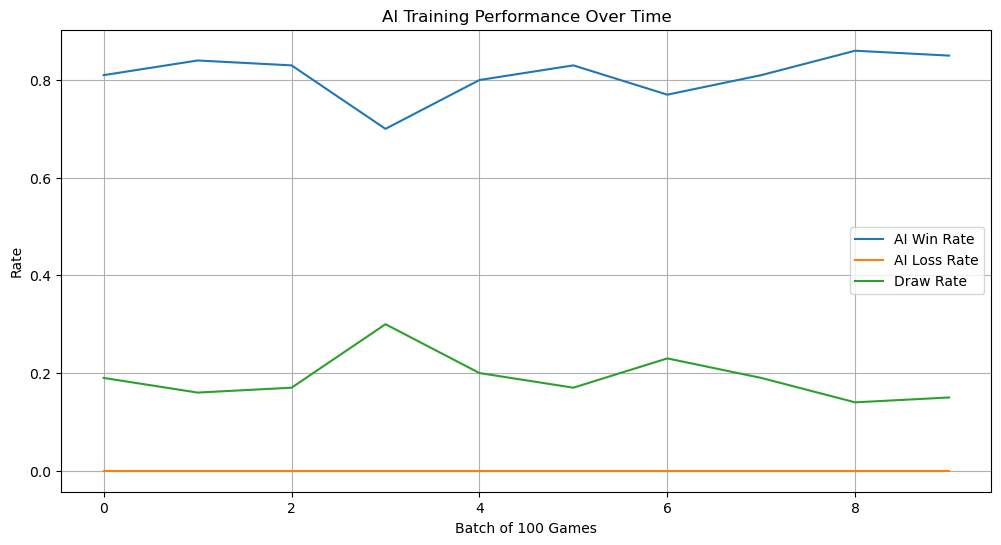

In [24]:


game1=tictactoe()
agent2=Agent()
agent2.load_model("trained_agent1.pkl")
agent2.epsilon = 0.0

win_log = []
loss_log = []
draw_log = []
total_wins = 0
total_losses = 0
total_draws = 0

num_games = 1000
batch=100
for epoch in range (num_games):
    game1.reset_game()
    #current_player=random.randint(1,2)
    current_player = 1 if epoch % 2 == 0 else 2
    game1.current_player = current_player
    while (not (game1.gameover)):
        
        if current_player==1 :
            canon_state_key , transform =game1.get_canonical_key(game1.board)
            canon_board=game1.key_state_to_board(canon_state_key)
            canon_possible_actions=game1.get_possible_actions(canon_board)

            canon_action=agent2.choose_action(canon_state_key,canon_possible_actions)
            action=game1.inverse_action(canon_action, transform)
            game_flag=game1.next_move(action[0],action[1]) #who won or if draw
            current_player=2


            if (game1.gameover):
                if game_flag == 1.0 : 
                    total_wins += 1 
                else:
                    total_draws += 1
                break
            current_player=2
        else:
            game_flag=game1.bot_move()

            if (game1.gameover):
                if game_flag == 2.0: 
                    total_losses += 1
                
                    print("\n--- DETECTED AGENT LOSS ---")
                    game1.view_board()
                    print("The agent failed to block this.")
                else: 
                    total_draws += 1
                break
            current_player=1

    if (epoch + 1) % batch== 0:
            win_rate = total_wins / batch
            loss_rate = total_losses / batch
            draw_rate = total_draws / batch
            
            win_log.append(win_rate)
            loss_log.append(loss_rate)
            draw_log.append(draw_rate)
            print(f"Epoch {epoch+1}/{num_games} | Win Rate: {win_rate:.2f} | Loss Rate: {loss_rate:.2f} | Draw Rate: {draw_rate:.2f}")
            total_wins = 0
            total_losses = 0
            total_draws = 0


print("Training complete!")
plt.figure(figsize=(12, 6))
plt.plot(win_log, label='AI Win Rate')
plt.plot(loss_log, label='AI Loss Rate')
plt.plot(draw_log, label='Draw Rate')
plt.xlabel(f'Batch of {batch} Games')
plt.ylabel('Rate')
plt.title('AI Training Performance Over Time')
plt.legend()
plt.grid(True)
plt.show()



